In [1]:
from google.colab import files
uploaded = files.upload()

Saving abalone.csv to abalone (3).csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
data = pd.read_csv("abalone.csv")
df = pd.DataFrame(data)
df.head()

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sex      4177 non-null   object 
 1   Length   4177 non-null   float64
 2   Diam     4177 non-null   float64
 3   Height   4177 non-null   float64
 4   Whole    4177 non-null   float64
 5   Shucked  4177 non-null   float64
 6   Viscera  4177 non-null   float64
 7   Shell    4177 non-null   float64
 8   Rings    4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df.describe()

,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


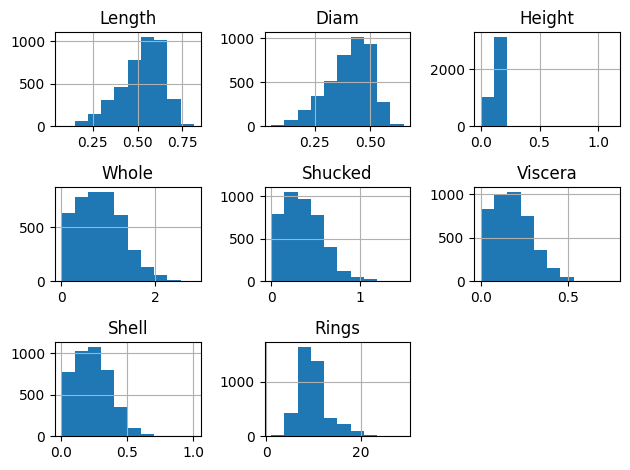

In [6]:
df.hist()
plt.tight_layout()

In [7]:
import collections
dict(sorted(collections.Counter(df.Rings.values.tolist()).items(),
            key=lambda x:x[1]))

{1: 1,
 26: 1,
 29: 1,
 2: 1,
 25: 1,
 27: 2,
 24: 2,
 22: 6,
 23: 9,
 21: 14,
 3: 15,
 20: 26,
 19: 32,
 18: 42,
 4: 57,
 17: 58,
 16: 67,
 15: 103,
 5: 115,
 14: 126,
 13: 203,
 6: 259,
 12: 267,
 7: 391,
 11: 487,
 8: 568,
 10: 634,
 9: 689}

In [8]:
df.head()

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
X = df.iloc[:,1:8]
X.head()

,Length,Diam,Height,Whole,Shucked,Viscera,Shell
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [10]:
y = df.iloc[:,8]
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

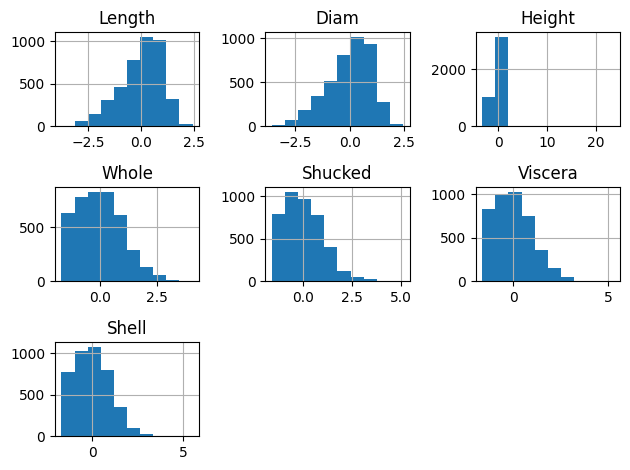

In [11]:
std_X = (X - np.mean(X, axis=0))/np.std(X, axis=0)
std_X.hist()
plt.tight_layout()

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [13]:
class RegressionNet:
  
  def __init__(self, batch_size=64, hidden_num=100, total_epoch=1000, zeta=1e-5):
    self.batch_size = batch_size
    self.hidden_num = hidden_num
    self.total_epoch = total_epoch
    self.zeta = zeta
    self.loss_log = []

    self.weight_1 = None
    self.weight_2 = None

  def make_batch_data(self, X, y):
    batched_data = []
    data = X.copy()
    data["target"] = y
    shuffled = sklearn.utils.shuffle(data)
    i = 0
    while True:
      if i > len(y):
        break
      batched_data.append(shuffled[i:i+self.batch_size])
      i += self.batch_size
    return batched_data

  def fit(self, X, y):
    weight_1 = np.random.randn(len(X.columns), self.hidden_num)
    weight_2 = np.random.randn(self.hidden_num, 1)
    train_data = self.make_batch_data(X, y)
    for epoch in range(self.total_epoch):
      sse_loss = 0.0
      for i, data in enumerate(train_data):
        x_train, y_train = data.drop(["target"], axis=1).values, data["target"]
        out = x_train @ weight_1
        relu_out = np.maximum(out, 0)
        y_pred = relu_out @ weight_2
        sse_loss = np.square(y_pred - y_train.values.reshape(-1,1)).sum()

        gy_pred = 2.0*(y_pred - y_train.values.reshape(-1,1))
        gweight_2 = relu_out.T @ gy_pred
        grelu_out = gy_pred @ weight_2.T
        gout = grelu_out.copy()
        gout[out < 0] = 0
        gweight_1 = x_train.T @ gout

        weight_1 -= self.zeta * gweight_1
        weight_2 -= self.zeta * gweight_2
      print(f"{epoch} epoch and loss is {sse_loss}")
      if len(self.loss_log) > 1:
        if sse_loss < self.loss_log[-1]:
          self.weight_1 = weight_1
          self.weight_2 = weight_2
      self.loss_log.append(sse_loss)
    print("learning end")
  
  def predict(self, X):
      out = X.values @ self.weight_1
      relu_out = np.maximum(out, 0)
      y_pred = relu_out @ self.weight_2
      return y_pred.reshape(-1)
  
  def plot_loss(self):
    plt.title("loss")
    plt.plot(np.arange(len(self.loss_log)), self.loss_log)
    plt.show()


In [14]:
# X_train, X_test, y_train, y_test = train_test_split(std_X, y, test_size=0.1)
# model = LinearRegression()
# model.fit(X_train, y_train)
# pred_train = model.predict(X_train)
# pred_test = model.predict(X_test)

In [15]:
# X_train, X_test, y_train, y_test = train_test_split(std_X, y, test_size=0.1)
# model = Lasso(alpha=0.1)
# model.fit(X_train, y_train)
# pred_train = model.predict(X_train)
# pred_test = model.predict(X_test)

In [16]:
from sklearn.metrics import r2_score

def sort_and_plot(gt, pred):
  df = pd.DataFrame(np.array([gt,pred]).astype(float).T)
  df.columns = ["gt", "pred"]
  df = df.sort_values("gt")
  print(type(df))
  return df["gt"].values, df["pred"].values


def train_and_validatoin(X, y, model, test_size=0.4):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
  model.fit(X_train, y_train)
  pred_train = model.predict(X_train)
  pred_test = model.predict(X_test)

  ys_train, preds_train = sort_and_plot(y_train.values, pred_train)
  plt.plot(np.arange(len(preds_train)), preds_train, c="green")
  plt.plot(np.arange(len(ys_train)), ys_train, c="blue")
  plt.show()
  r2 = r2_score(y_train.values, pred_train)
  mae = np.mean(np.abs(pred_train - y_train.values))
  rmse = np.sqrt(np.mean((pred_train - y_train.values)**2))
  print("train_r2", r2)
  print("train_mae", mae)
  print("train_rmse", rmse)
  print()

  if hasattr(model, "plot_loss"):
    model.plot_loss()

  ys_test, preds_test = sort_and_plot(y_test.values, pred_test)
  plt.plot(np.arange(len(preds_test)), preds_test, c="green")
  plt.plot(np.arange(len(ys_test)), ys_test, c="blue")
  plt.show()
  r2 = r2_score(y_test.values, pred_test)
  mae = np.mean(np.abs(pred_test - y_test.values))
  rmse = np.sqrt(np.mean((pred_test - y_test.values)**2))
  print("test_r2", r2)
  print("test_mae", mae)
  print("test_rmse", rmse)

<class 'pandas.core.frame.DataFrame'>


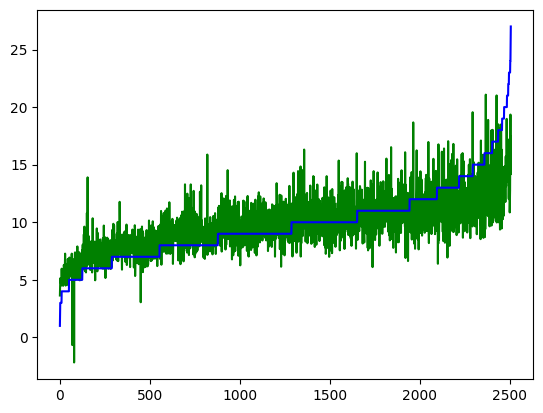

train_r2 0.5398984722183223
train_mae 1.5855110079905288
train_rmse 2.1834358455805

<class 'pandas.core.frame.DataFrame'>


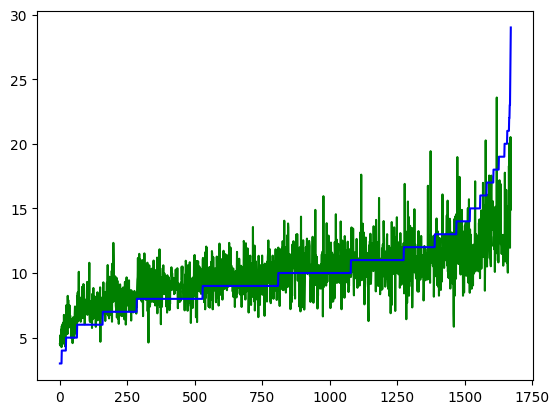

test_r2 0.5039556490738335
test_mae 1.6362700630915008
test_rmse 2.2719725386798886


In [17]:
train_and_validatoin(std_X, y, Ridge(alpha=0.5))

0 epoch and loss is 230.27519452504112
1 epoch and loss is 154.55127000043117
2 epoch and loss is 127.04832771166586
3 epoch and loss is 116.36481240666305
4 epoch and loss is 109.06126086850975
5 epoch and loss is 104.3770800218166
6 epoch and loss is 101.4597784937652
7 epoch and loss is 99.2050820580602
8 epoch and loss is 97.60246494063541
9 epoch and loss is 96.72794596531931
10 epoch and loss is 96.24088695653812
11 epoch and loss is 95.85134986663682
12 epoch and loss is 95.42226559934525
13 epoch and loss is 95.06827027493796
14 epoch and loss is 94.73322209608833
15 epoch and loss is 94.62343319215769
16 epoch and loss is 94.75616918454676
17 epoch and loss is 94.83082311852728
18 epoch and loss is 94.90060135085552
19 epoch and loss is 94.90179011193317
20 epoch and loss is 94.87657743556059
21 epoch and loss is 94.74957922475559
22 epoch and loss is 94.58544315943156
23 epoch and loss is 94.35328751162085
24 epoch and loss is 94.36437753202304
25 epoch and loss is 93.9890410

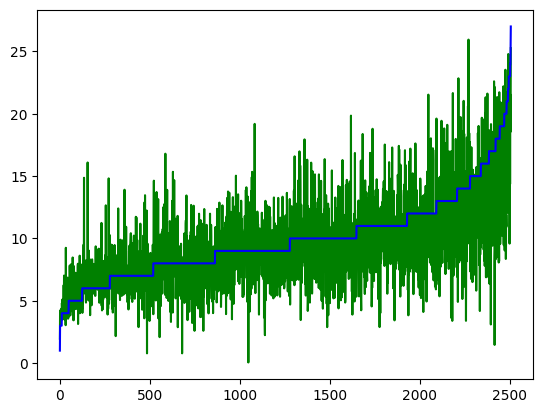

train_r2 0.12433254769474633
train_mae 2.2872757902517136
train_rmse 3.0658647654288442



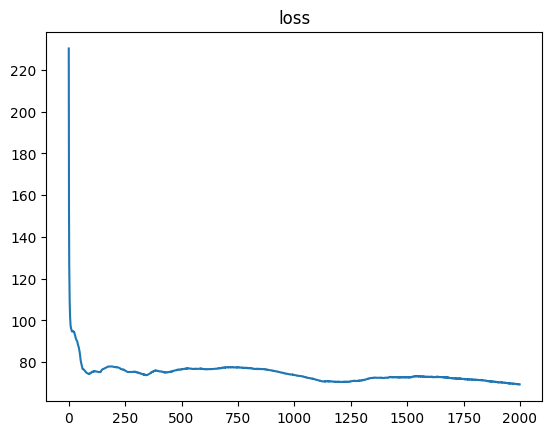

<class 'pandas.core.frame.DataFrame'>


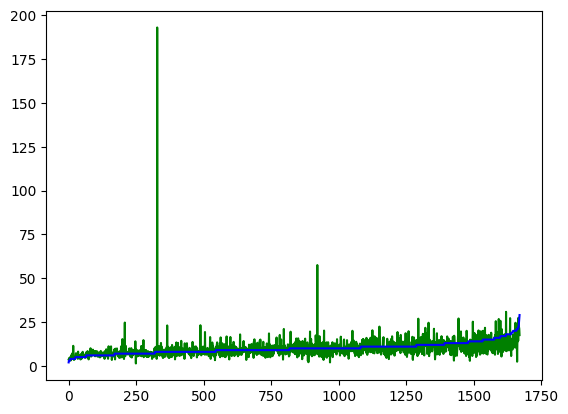

test_r2 -2.4055012392405266
test_mae 2.638638644741735
test_rmse 5.800397339379233


In [18]:
train_and_validatoin(std_X, y, RegressionNet(hidden_num=100, total_epoch=2000))

In [19]:
# import seaborn as sns
# sns.regplot(x=y_test, y=pred_test,ci=50)
# mae = np.mean(np.abs(pred_test - y_test.values))
# rmse = np.sqrt(np.mean((pred_test - y_test.values)**2))
# print(mae)
# print(rmse)